# Proyek Analisis Data: bike-sharing-dataser
- **Nama:** Fajar Satria Wiguna
- **Email:** fajarsatria991@gmail.com
- **ID Dicoding:** fajarwiguna

## Menentukan Pertanyaan Bisnis

- Bagaimana pola peminjaman sepeda berdasarkan bulan dan musim?
- Bagaimana pengaruh kondisi cuaca (weathersit, suhu, kelembaban, kecepatan angin) terhadap jumlah - peminjaman sepeda?
- Bagaimana perbandingan jumlah peminjaman antara pengguna kasual dan pengguna terdaftar?
- Apakah pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dibandingkan hari kerja?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [37]:
bikes_per_hour_df = pd.read_csv('data/hour.csv')
bikes_per_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [38]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset hour.csv berisi data peminjaman sepeda per jam, termasuk tanggal, musim, suhu, kelembaban, kecepatan angin, dan jumlah total peminjaman.

In [39]:
bikes_per_day_df = pd.read_csv('data/day.csv')
bikes_per_day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Dataset day.csv mirip dengan hour.csv, tetapi hanya mencatat data harian tanpa informasi per jam.

### Assessing Data

In [40]:
bikes_per_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [41]:
bikes_per_hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [42]:
print("Jumlah duplikasi: ", bikes_per_hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [43]:
bikes_per_hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
Kolom dteday masih dalam format object, seharusnya dalam format datetime.
Tidak ada missing values atau data duplikat dalam hour.csv.

Tabel hour.csv

In [44]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


data diatas sudah aman karena tidak ada missing value nya, tetapi kolom dtday masih bersifat objek dan akan kita ubah ke datetime


In [45]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kolom dteday masih dalam tipe object pada tabel day.csv dan perlu dikonversi ke datetime agar lebih mudah dianalisis.
- Kolom dteday masih dalam tipe object pada tabel hour.csv dan perlu dikonversi ke datetime agar lebih mudah dianalisis.

In [47]:
bikes_per_day_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [48]:
bikes_per_day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [49]:
print("Jumlah duplikasi: ", bikes_per_day_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
bikes_per_day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Sama seperti hour.csv, kolom dteday perlu dikonversi ke format datetime.
- Tidak ada missing values atau duplikasi dalam day.csv.

### Cleaning Data

Mengubah tipe data dteday menjadi datetime pada tabel day.csv

In [51]:
bikes_per_hour_df['dteday'] = pd.to_datetime(bikes_per_hour_df['dteday'])
bikes_per_hour_df.info()

bikes_per_day_df['dteday'] = pd.to_datetime(bikes_per_day_df['dteday'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [52]:
bikes_per_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
Kolom dteday telah dikonversi ke format datetime.

In [53]:
datetime_columns = ["dteday"]

for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [54]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- kolom dtday pada kedua tabel sudah kita ubah ke format datetime

## Exploratory Data Analysis (EDA)

**Analisis Tren Peminjaman Sepeda Berdasarkan Bulan**

In [55]:
bikes_per_day_df['year_month'] = bikes_per_day_df['dteday'].dt.to_period('M')
monthly_trend = bikes_per_day_df.groupby('year_month')['cnt'].sum()
print(monthly_trend)

year_month
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Freq: M, Name: cnt, dtype: int64


**Insight:**
- Peminjaman sepeda meningkat pada pertengahan tahun (Mei - September).
- Terjadi penurunan pada bulan Desember.

**Analisis Peminjaman Berdasarkan Hari dalam Seminggu**

In [56]:
bikes_per_day_df.groupby('weekday').agg({
    "casual": ["sum"],
    "registered": ["sum"],
    "cnt": ["sum"]
})

,casual,registered,cnt
,sum,sum,sum
weekday,,,
0,140521,303506,444027
1,70784,384719,455503
2,57843,411266,469109
3,57319,415729,473048
4,61460,423935,485395
5,78238,409552,487790
6,153852,323955,477807


**Insight:**
- Peminjaman meningkat pada hari kerja, kemungkinan karena komuter.
- Akhir pekan cenderung memiliki lebih banyak pengguna kasual.

**Analisis Peminjaman Berdasarkan Musim**

In [57]:
seasonal_usage = bikes_per_hour_df.groupby("season")[["casual", "registered"]].sum()
seasonal_usage["total"] = seasonal_usage["casual"] + seasonal_usage["registered"]
seasonal_usage = seasonal_usage.sort_values(by="total", ascending=False)
print(seasonal_usage)

        casual  registered    total
season                             
3       226091      835038  1061129
2       203522      715067   918589
4       129782      711831   841613
1        60622      410726   471348


**Insight:**
- Peminjaman sepeda tertinggi terjadi pada musim gugur.
- Pengguna kasual lebih banyak meminjam pada musim panas dan gugur dibanding musim lain.

Analisis Peminjaman Berdasarkan Jam

In [58]:
wind_avg = bikes_per_hour_df.groupby('windspeed', as_index=False)['cnt'].sum()
cnt_min = wind_avg.sort_values(by="cnt", ascending=True)
cnt_max = wind_avg.sort_values(by="cnt", ascending=False)
print(cnt_min.head(5))
print(cnt_max.head(5))

    windspeed  cnt
26     0.7761    5
28     0.8358   16
27     0.8060  207
24     0.7164  281
25     0.7463  360
   windspeed     cnt
0     0.0000  350203
4     0.1642  332998
5     0.1940  332407
6     0.2239  320678
3     0.1343  306423


**Insight:**
- Peminjaman berkurang drastis pada kecepatan angin tinggi (> 0.35).
- Pengguna lebih nyaman meminjam sepeda pada kecepatan angin rendah.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola peminjaman sepeda berdasarkan bulan dan musim?

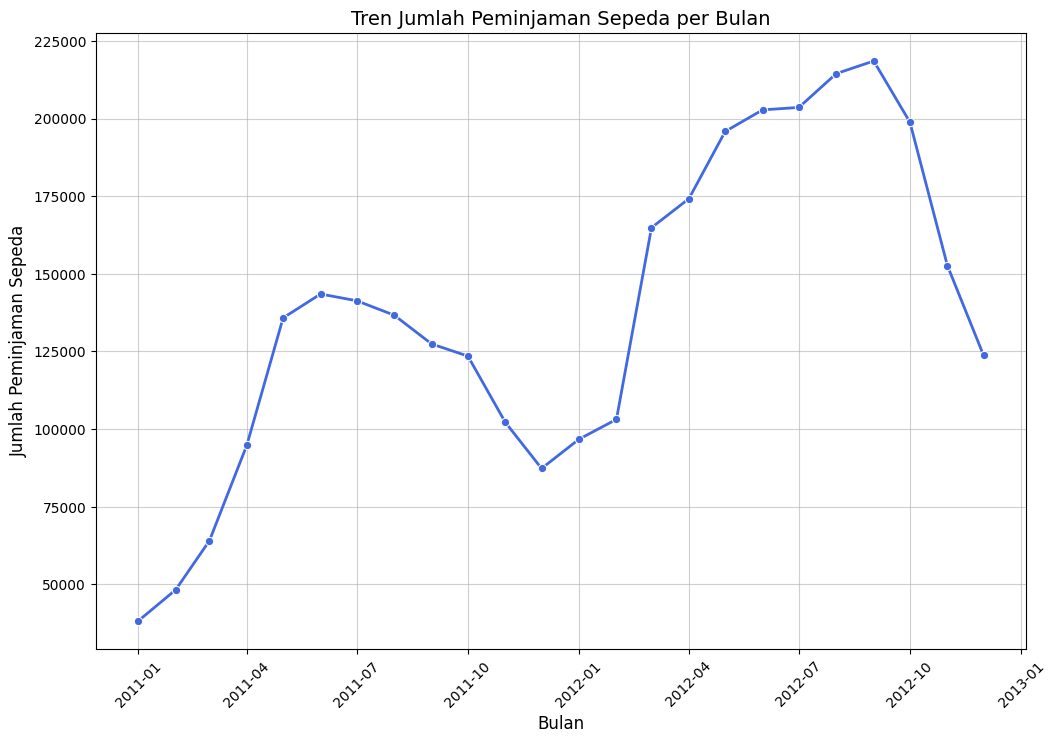

In [59]:
monthly_trend_df = bikes_per_day_df.groupby('year_month')['cnt'].sum()
monthly_trend_df.index = monthly_trend_df.index.to_timestamp()

plt.figure(figsize=(12, 8))
sns.lineplot(x=monthly_trend_df.index, y=monthly_trend_df.values, marker="o", linewidth=2, color="royalblue")
plt.title("Tren Jumlah Peminjaman Sepeda per Bulan", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Peminjaman Sepeda", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.6)
plt.show()

**Insight:**
- Tren peminjaman sepeda meningkat pada pertengahan tahun, terutama dari April hingga September.  
- Pada 2011, peminjaman naik signifikan dari April hingga Juli sebelum mulai menurun.  
- Pada 2012, tren serupa terjadi dengan peningkatan dari April hingga September.  
- Secara umum, peminjaman lebih sering terjadi pada pertengahan hingga akhir tahun dibanding awal tahun.

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap peminjaman sepeda?

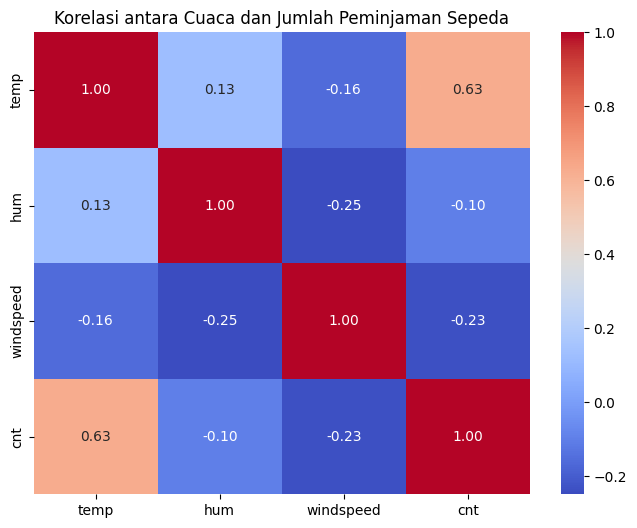

In [60]:
weather_corr = bikes_per_day_df[['temp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antara Cuaca dan Jumlah Peminjaman Sepeda")
plt.show()


**Insight:**
- Suhu (temp) memiliki korelasi positif tinggi (0.63) dengan jumlah peminjaman sepeda, artinya semakin hangat suhu, semakin banyak peminjaman sepeda.
- Kelembaban (hum) memiliki korelasi lemah (-0.10) dengan peminjaman, menunjukkan bahwa kelembaban tidak terlalu berpengaruh terhadap keputusan pengguna dalam menyewa sepeda.
- Kecepatan angin (windspeed) memiliki korelasi negatif (-0.23) dengan peminjaman, yang berarti semakin kencang angin, semakin sedikit orang yang meminjam sepeda, meskipun pengaruhnya tidak terlalu kuat.

### Pertanyaan 3: Bagaimana perbandingan jumlah peminjaman antara pengguna kasual dan pengguna terdaftar?

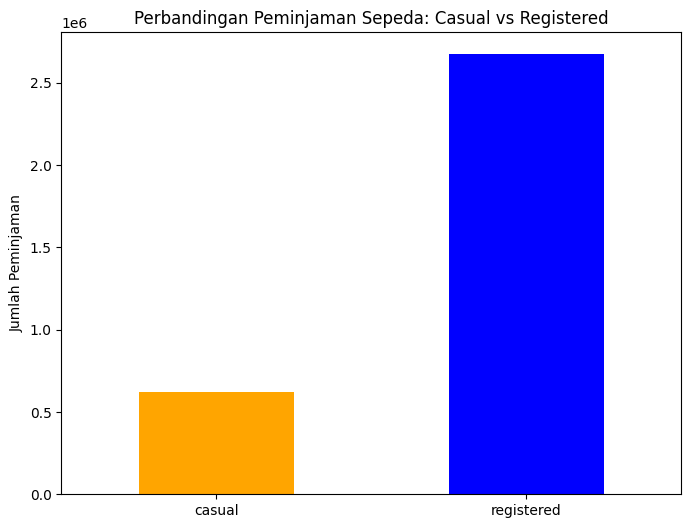

In [61]:
user_type_usage = bikes_per_day_df[['casual', 'registered']].sum()
user_type_usage.plot(kind="bar", color=["orange", "blue"], figsize=(8, 6))
plt.title("Perbandingan Peminjaman Sepeda: Casual vs Registered")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=0)
plt.show()

**Insight:**
- Jumlah peminjaman oleh pengguna terdaftar (registered) jauh lebih tinggi dibandingkan pengguna kasual (casual).
- Pengguna terdaftar meminjam sepeda lebih dari 4 kali lipat dibanding pengguna kasual.
- Hal ini menunjukkan bahwa layanan peminjaman sepeda lebih banyak digunakan oleh pelanggan tetap dibanding pengguna sesekali.

### Pertanyaan 4: Apakah pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dibandingkan hari kerja?

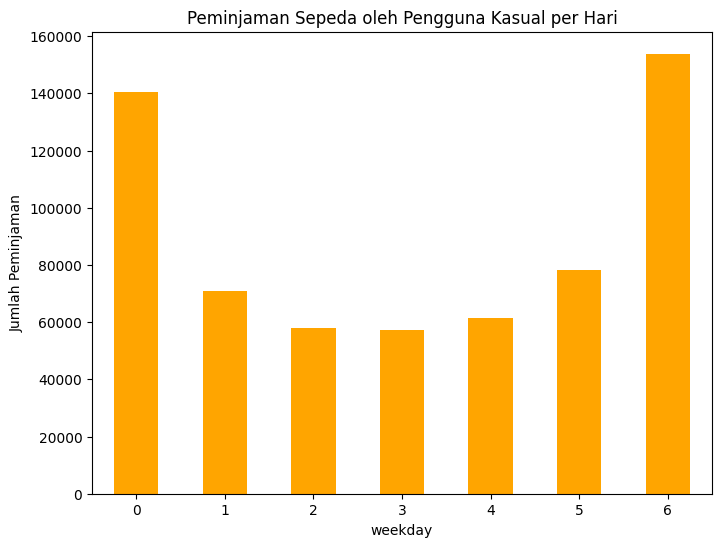

In [62]:
casual_weekday = bikes_per_day_df.groupby("weekday")["casual"].sum()
casual_weekday.plot(kind="bar", color="orange", figsize=(8, 6))
plt.title("Peminjaman Sepeda oleh Pengguna Kasual per Hari")
plt.ylabel("Jumlah Peminjaman")
plt.xticks(rotation=0)
plt.show()


**Insight:**
- Pengguna kasual lebih sering menggunakan sepeda pada akhir pekan dibandingkan hari kerja.
- Peningkatan signifikan terlihat terutama pada hari ke-0 dan ke-6, yang menunjukkan bahwa mereka lebih memilih bersepeda sebagai aktivitas rekreasi saat libur.
- Hari kerja memiliki jumlah peminjaman yang lebih rendah dan merata, menunjukkan bahwa sepeda kemungkinan kurang digunakan untuk keperluan komuter oleh pengguna kasual.

## Conclusion

Berdasarkan hasil analisis data peminjaman sepeda, berikut adalah kesimpulan utama:

1. **Tren Peminjaman Sepeda Berdasarkan Bulan dan Musim**  
   - Peminjaman sepeda cenderung meningkat pada pertengahan tahun, terutama dari bulan **April hingga September**.  
   - Musim gugur memiliki jumlah peminjaman tertinggi, terutama oleh pengguna kasual.  
   - Pada akhir tahun, terutama **Desember**, jumlah peminjaman menurun signifikan.  

2. **Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda**  
   - **Suhu (temp)** memiliki korelasi positif terhadap peminjaman sepeda, artinya semakin hangat suhu, semakin tinggi peminjamannya.  
   - **Kelembaban (hum)** memiliki korelasi yang sangat lemah, sehingga tidak terlalu berpengaruh terhadap keputusan pengguna dalam meminjam sepeda.  
   - **Kecepatan angin (windspeed)** memiliki korelasi negatif terhadap peminjaman, menunjukkan bahwa angin kencang cenderung mengurangi jumlah peminjaman sepeda.  

3. **Perbandingan Pengguna Kasual dan Pengguna Terdaftar**  
   - Pengguna **terdaftar (registered)** jauh lebih sering meminjam sepeda dibandingkan pengguna **kasual (casual)**.  
   - Jumlah peminjaman pengguna terdaftar lebih dari **4 kali lipat** dibandingkan pengguna kasual.  
   - Hal ini menunjukkan bahwa mayoritas pengguna adalah pelanggan tetap yang memanfaatkan layanan ini secara rutin.  

4. **Kebiasaan Pengguna Kasual pada Akhir Pekan**  
   - Pengguna kasual lebih sering meminjam sepeda pada **akhir pekan** dibandingkan hari kerja.  
   - Peminjaman meningkat signifikan pada hari **Sabtu dan Minggu**, menunjukkan bahwa sepeda lebih sering digunakan sebagai aktivitas rekreasi oleh pengguna kasual.  
   - Pada hari kerja, jumlah peminjaman oleh pengguna kasual relatif lebih rendah dan merata.  

Kesimpulan ini dapat menjadi dasar untuk mengembangkan strategi dalam meningkatkan jumlah peminjaman sepeda, seperti memberikan promo pada musim dingin atau menargetkan pengguna kasual dengan program khusus di akhir pekan.  
